<a href="https://colab.research.google.com/github/Paulina9555/Test/blob/master/cv_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Konfiguracja

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
!ls -la '/content/drive/My Drive/Colab Notebooks/'

total 27657
-rw------- 1 root root   50673 Jul 30 13:36 '29, 30.07.2023.ipynb'
-rw------- 1 root root  110193 Dec 29 14:33  3_4.ipynb
-rw------- 1 root root  191197 Dec 29 14:01  biblioteka_tensorflow_zadania.ipynb
-rw------- 1 root root 5450929 Dec 10 12:49 'computer vision.ipynb'
-rw------- 1 root root    9053 Dec 29 14:40  computer_vision_zadanie.ipynb
-rw------- 1 root root  961975 Dec 29 14:40  cv_day1.ipynb
drwx------ 2 root root    4096 Aug  6 08:52  files
-rw------- 1 root root 4624629 Oct 14 18:44  karmy_dla_psow.ipynb
-rw------- 1 root root   80150 Dec 28 20:00  klasyfikacja_zadania.ipynb
-rw------- 1 root root  432312 Nov 25 13:02 'Kopia notatnika Tensorflow_Exercises_part_1_pol40.ipynb'
-rw------- 1 root root   81204 Nov 27 18:58 'Kopia notatnika Tensorflow_Exercises_part_4_pol40.ipynb'
-rw------- 1 root root   22718 Dec  2 08:32 'Kopia notatnika Wstęp_do_sieci_3 pol 40.ipynb'
-rw------- 1 root root 2403001 Nov 26 08:43 'Kopia notatnika Wstęp_do_sieci_cz_2 pol40.ipynb'
-r

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

img = cv2.imread('/content/drive/My Drive/Colab Notebooks/test.png')
cv2_imshow(img)

AttributeError: ignored

# Filtry

In [ ]:
#Filtry

import numpy as np

def apply_filter(source, kernel):
  new_image = cv2.filter2D(source, -1, kernel)
  cv2_imshow(new_image)
  return new_image


#idendity
idendity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])
apply_filter(img, idendity_kernel)

#blur
blur_kernel = np.ones((3, 3), np.float32) / 9
apply_filter(img, blur_kernel)

#sharpen
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

apply_filter(img, sharpen_kernel)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#simply_edge_detection
simply_edge_kernel = np.array([[-1, -1, -1],
                               [-1, 8, -1],
                               [-1, -1, -1]])

apply_filter(gray_img, simply_edge_kernel)

#bottom sobel
bottom_sobel_kernel = np.array([[-1, -2, -1],
                                [0, 0, 0],
                                [1, 2, 1]])

bottom_sobel = apply_filter(gray_img, bottom_sobel_kernel)

#bottom sobel
left_sobel_kernel = np.array([[1, 0, -1],
                              [2, 0, -2],
                              [1, 0, -1]])

left_sobel = apply_filter(gray_img, left_sobel_kernel)


#sobel
sobel = left_sobel/2 + bottom_sobel/2
cv2_imshow(sobel)



error: ignored

# Wyrównanie histogramu

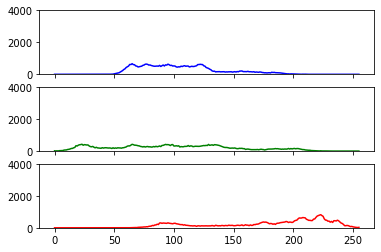

In [ ]:
import matplotlib.pyplot as plt

def show_histogram(image):
  ax1 = plt.subplot(331)
  plt.xlim([0, 256])
  plt.ylim([0, 4000])
  for i, col in enumerate(['b', 'g', 'r']):

      hist = cv2.calcHist([image], [i], None, [256], [0, 256])
      ax1 = plt.subplot(3,1,i+1, sharey=ax1)
      plt.plot(hist, color = col)

      if i<2:
        plt.setp(ax1.get_xticklabels(), visible=False)

  plt.show()

show_histogram(img)

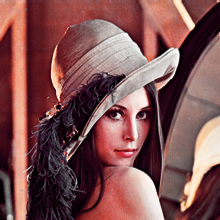

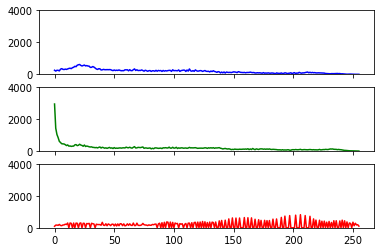

In [ ]:
def show_hsv_equalized(image):
    new_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(new_image)
    eq_H = cv2.equalizeHist(H)
    eq_S = cv2.equalizeHist(S)
    eq_V = cv2.equalizeHist(V)
    eq_image = cv2.cvtColor(cv2.merge([H, eq_S, eq_V]), cv2.COLOR_HSV2BGR)
    cv2_imshow(eq_image)
    show_histogram(eq_image)

show_hsv_equalized(img)

# Progresja

In [ ]:
def threshold(image):
  @interact(x=widgets.IntSlider(min=0, max=255, step=1, value=100))
  def trackbar(x):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,thresh1 = cv2.threshold(gray_img,x,255,cv2.THRESH_BINARY)
    cv2_imshow(thresh1)

threshold(img)

interactive(children=(IntSlider(value=100, description='x', max=255), Output()), _dom_classes=('widget-interac…

In [ ]:
def adaptive_threshold(image):
  @interact(x=widgets.IntSlider(min=3, max=15, step=2, value=9), y=True)
  def trackbar(x, y):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if y:
      adaptive_method = cv2.ADAPTIVE_THRESH_MEAN_C
    else:
      adaptive_method = cv2.ADAPTIVE_THRESH_GAUSSIAN_C

    result = cv2.adaptiveThreshold(gray_img,255,adaptive_method,
                                      cv2.THRESH_BINARY,x,2)
    cv2_imshow(result)


adaptive_threshold(img)

interactive(children=(IntSlider(value=9, description='x', max=15, min=3, step=2), Checkbox(value=True, descrip…

# Operacja morfologiczna

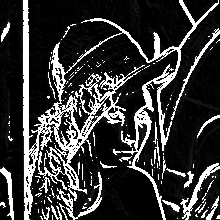

interactive(children=(Dropdown(description='operation', options=('Erosion', 'Dilation', 'Opening', 'Closing'),…

In [ ]:
def morphological_operation(image):

  def opening(img, kernel):
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

  def closing(img, kernel):
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

  @interact(operation=['Erosion','Dilation', 'Opening', 'Closing'],
            struct_el=['MORPH_RECT','MORPH_ELLIPSE', 'MORPH_CROSS'],
            size = widgets.IntSlider(min=3, max=15, step=2, value=5))
  def trackbar(operation, struct_el, size):
    operation_dict = {'Erosion': cv2.erode,'Dilation': cv2.dilate,
                      'Opening': opening, 'Closing': closing}
    struct_el_dict = {'MORPH_RECT': cv2.getStructuringElement(cv2.MORPH_RECT,(size, size)),
                      'MORPH_ELLIPSE': cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(size, size)),
                      'MORPH_CROSS': cv2.getStructuringElement(cv2.MORPH_CROSS,(size, size))}
    result = operation_dict[operation](image, struct_el_dict[struct_el])
    cv2_imshow(result)


#using sobel output form above
sobel[sobel>30] = 255
cv2_imshow(sobel)
morphological_operation(sobel)


# Ekstrakcja cech charakterystycznych

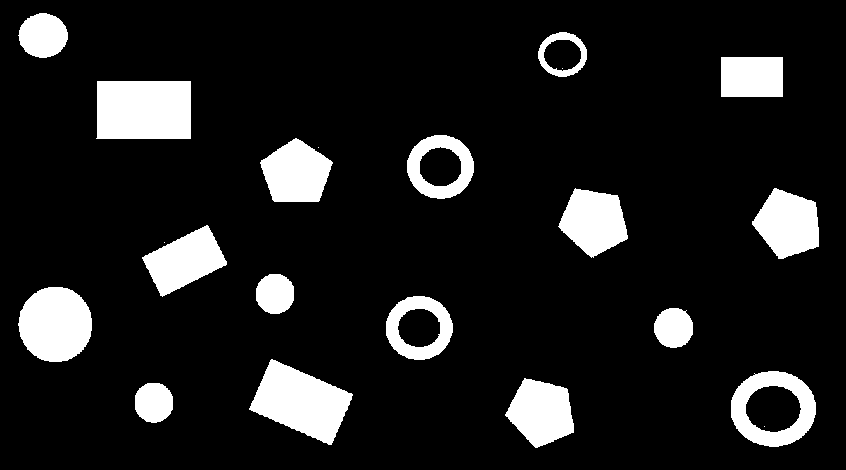

In [ ]:
import numpy as np
shapes = cv2.imread('/content/drive/My Drive/Colab Notebooks/contours.png')

gray_shapes = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)
_,thresh1 = cv2.threshold(gray_shapes,50,255,cv2.THRESH_BINARY)
cv2_imshow(thresh1)

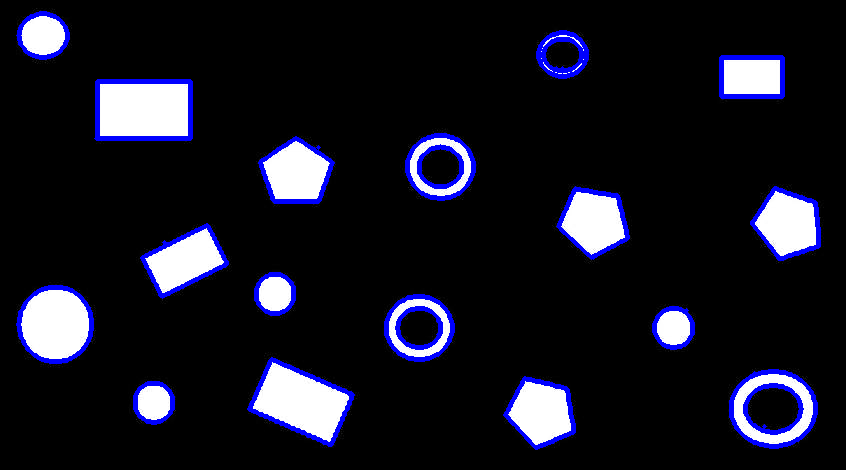

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 5  1  3 -1]
  [-1 -1  4  2]
  [-1 -1 -1  3]
  [ 6  2 -1 -1]
  [ 7  5 -1 -1]
  [ 9  6  8 -1]
  [-1 -1 -1  7]
  [10  7 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [19 16 18 -1]
  [-1 -1 -1 17]
  [20 17 -1 -1]
  [21 19 -1 -1]
  [24 20 22 -1]
  [-1 -1 23 21]
  [-1 -1 -1 22]
  [-1 21 -1 -1]]]


In [ ]:
contours, hierarchy	=	cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_with_contours = cv2.drawContours(shapes, contours, -1, (255,0,0), 3)
cv2_imshow(img_with_contours)
print(hierarchy)

In [ ]:
# Pozbyć się wewnętrznych konturów, wydobyć informacje o dziecku

filtered_contours = []
has_a_child = []

for contour, h in zip(contours, hierarchy[0]):
  if h[3] == -1:
    filtered_contours.append(contour)
    if h[2] != -1:
      has_a_child.append(1)
    else:
      has_a_child.append(0)

print(has_a_child)

[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]


In [ ]:
# Pobierz wszystkie użyteczne informacje z konturów
features_list = []

for contour, childs in zip(filtered_contours, has_a_child):
  print(contour)
  moments = cv2.moments(contour)
  hu_moments = cv2.HuMoments(moments)

  contour_area = cv2.contourArea(contour)
  arc_length = cv2.arcLength(contour, True)
  if arc_length > 0:
    features = {x: hu[0] for x, hu in enumerate(hu_moments)}
    features['circularity'] = 4 * 3.14 * contour_area / arc_length**2
    features['has_child'] = childs
    features_list.append(features)

In [ ]:
# Zapisz dane jako pd.DataFrame
import pandas as pd

pd.options.display.float_format = "{:,.2f}".format
df = pd.DataFrame(features_list)
df

,0,1,2,3,4,5,6,circularity,has_child
0,0.16,0.00,0.00,0.00,-0.00,-0.00,0.00,0.88,0
1,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.76,0
2,0.16,0.00,0.00,0.00,-0.00,-0.00,0.00,0.85,1
3,0.19,0.01,0.00,0.00,-0.00,-0.00,0.00,0.64,0
4,0.16,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.83,0
5,0.16,0.00,0.00,0.00,0.00,0.00,-0.00,0.88,1
6,0.16,0.00,0.00,0.00,-0.00,-0.00,0.00,0.86,0
7,0.16,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.89,0
8,0.19,0.01,0.00,0.00,-0.00,-0.00,0.00,0.64,0
9,0.16,0.00,0.00,0.00,-0.00,0.00,0.00,0.76,0


[0 3 5 2 0 1 0 0 2 3 3 3 1 4 4 5 0]
      0    1    2    3     4     5     6    7    8
0  0.18 0.00 0.00 0.00 -0.00 -0.00  0.00 0.98 0.00
1  0.21 0.00 0.00 0.00  0.00  0.00  0.00 0.98 0.00
2  0.12 0.00 0.00 0.00 -0.00 -0.00  0.00 0.64 0.76
3  0.28 0.01 0.00 0.00 -0.00 -0.00  0.00 0.96 0.00
4  0.19 0.00 0.00 0.00 -0.00 -0.00 -0.00 0.98 0.00
5  0.12 0.00 0.00 0.00  0.00  0.00 -0.00 0.66 0.75
6  0.18 0.00 0.00 0.00 -0.00 -0.00  0.00 0.98 0.00
7  0.18 0.00 0.00 0.00 -0.00 -0.00 -0.00 0.98 0.00
8  0.28 0.01 0.00 0.00 -0.00 -0.00  0.00 0.96 0.00
9  0.21 0.00 0.00 0.00 -0.00  0.00  0.00 0.98 0.00
10 0.21 0.00 0.00 0.00 -0.00 -0.00 -0.00 0.98 0.00
11 0.21 0.00 0.00 0.00 -0.00 -0.00 -0.00 0.98 0.00
12 0.12 0.00 0.00 0.00  0.00  0.00 -0.00 0.66 0.74
13 0.25 0.01 0.00 0.00  0.00 -0.00  0.00 0.97 0.00
14 0.24 0.01 0.00 0.00  0.00  0.00  0.00 0.97 0.00
15 0.12 0.00 0.00 0.00 -0.00 -0.00  0.00 0.65 0.75
16 0.19 0.00 0.00 0.00  0.00  0.00 -0.00 0.98 0.00


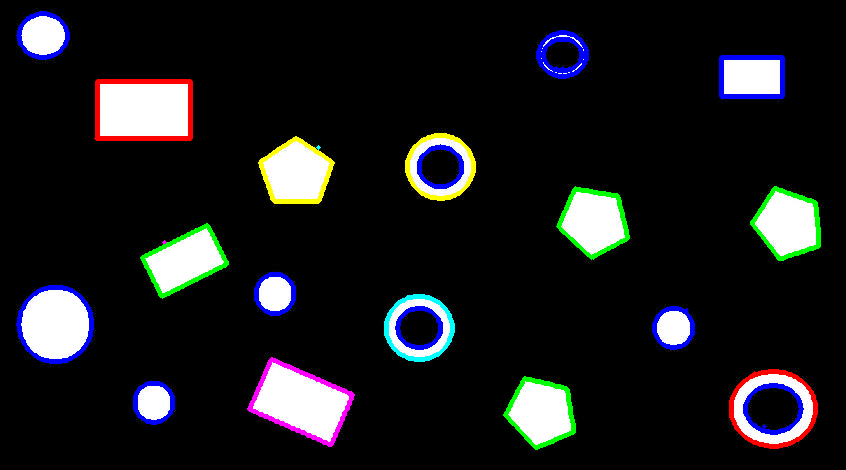

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

from sklearn import preprocessing

x = df.values #returns a numpy array
normalizer = preprocessing.Normalizer()
x_scaled = normalizer.fit_transform(x)
df = pd.DataFrame(x_scaled)

kmeans = KMeans(n_clusters=6, random_state=0).fit(df)
print(kmeans.labels_)

colors = [(255,0,0), (255,255,0), (255,0,255), (0,255,0), (0,255,255), (0,0,255)]
for contour, label in zip(filtered_contours, kmeans.labels_):
  classified = cv2.drawContours(shapes, [contour], 0, colors[label], 3)

print(df)
cv2_imshow(classified)


# Self - session

**MNIST**.

Zbiór danych MNIST jest akronimem zmodyfikowanego zbioru danych National Institute of Standards and Technology.

Jest to zbiór danych zawierający 60000 małych kwadratowych obrazów o wymiarach 28 × 28 pikseli w skali szarości, składających się z odręcznie napisanych pojedynczych cyfr od 0 do 9.

Zadanie polega na zaklasyfikowaniu danego obrazu odręcznie napisanej cyfry do jednej z 10 klas reprezentujących wartości całkowite od 0 do 9 włącznie.

Jest to powszechnie używany i głęboko zrozumiały zbiór danych, który w większości przypadków jest "rozwiązany". Modelami o najwyższej wydajności są plecione sieci neuronowe do uczenia głębokiego, które osiągają dokładność klasyfikacji powyżej 99%, przy poziomie błędów pomiędzy 0,4% a 0,2% na testowym zbiorze danych.

**Zadanie**.

Korzystając z konwencjonalnych metod, utwórz potok wyodrębniający cechy z obrazu i na ich podstawie spróbuj rozwiązać to zadanie.



1. Załadować bazę danych zdjęć do pamięci
2. Wyświetl kilka przykładowych obrazów w celu zapoznania się z MNIST-em
3. Utwórz funkcję, która pobiera z obrazu odpowiednie informacje o konturach
4. Utwórz funkcję, która pobiera cechy z konturu
5. Przedstaw dane w postaci ramek danych (nie zapomnij - zarówno dla obrazów testowych jak i treningowych)
6. Znormalizuj dane!
7. Klasyfikacja!!! Przedstawienie wyników w postaci raportu


# Odpowiedzi

1.   Ładowanie bazy danych zdjęć do pamięci




In [ ]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


2.   Zobacz kilka przykładowych obrazów, aby zapoznać się z MNIST


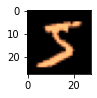

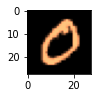

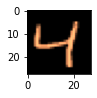

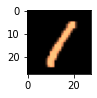

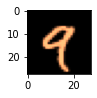

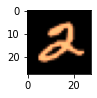

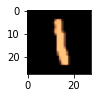

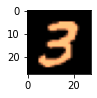

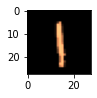

In [ ]:
# from matplotlib import pyplot

# for i in range(9):
#   pyplot.subplot(330 + 1 + i)
#   pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('copper'))
#   pyplot.show()


3.   Utwórz funkcję, która pobiera z obrazu odpowiednie informacje o konturze


In [ ]:
import pandas as pd

def get_contour(image):
  _,thresh1 = cv2.threshold(image,50,255,cv2.THRESH_BINARY)

  contours, hierarchy	=	cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  filtered_contours = []
  childs_list = []
  for contour, h in zip(contours, hierarchy[0]):
    if h[3] == -1:
      return contour, len(contours)-1

4.   Utwórz funkcję, która pobierze wyrazy z konspektu

In [ ]:
def get_fetures(cnt, childs):

  moments = cv2.moments(cnt)
  hu_moments = cv2.HuMoments(moments)
  features = {x: hu[0] for x, hu in enumerate(hu_moments)}
  contour_area = cv2.contourArea(cnt)
  arc_length = cv2.arcLength(cnt, True)
  try:
    features['circularity'] = 4 * 3.14 * contour_area / arc_length**2
  except ZeroDivisionError:
    features['circularity'] = 0
  features['childs'] = childs

  return features

5.   Przedstaw dane w postaci ramek danych (nie zapomnij - zarówno dla obrazów testowych, jak i treningowych)

In [ ]:
# train data

lst_features = []
for image in train_X:
  contour, childs = get_contour(image)
  lst_features.append(get_fetures(contour, childs))

pd.options.display.float_format = "{:,.2f}".format
df_train = pd.DataFrame(lst_features)
df_train

# test data

lst_features = []
for image in test_X:
  contour, childs = get_contour(image)
  lst_features.append(get_fetures(contour, childs))

pd.options.display.float_format = "{:,.2f}".format
df_test = pd.DataFrame(lst_features)
df_test


,0,1,2,3,4,5,6,circularity,childs
0,0.74,0.13,0.29,0.04,-0.00,0.00,-0.00,0.16,1
1,0.65,0.09,0.08,0.01,0.00,-0.00,0.00,0.13,0
2,0.95,0.87,0.05,0.05,0.00,0.04,-0.00,0.20,0
3,0.17,0.00,0.00,0.00,-0.00,-0.00,0.00,0.76,1
4,0.62,0.01,0.06,0.01,-0.00,0.00,0.00,0.11,0
...,...,...,...,...,...,...,...,...,...
9995,0.37,0.02,0.00,0.00,-0.00,-0.00,0.00,0.22,0
9996,0.40,0.03,0.01,0.00,-0.00,-0.00,-0.00,0.24,0
9997,0.31,0.02,0.01,0.00,0.00,0.00,0.00,0.23,0
9998,0.41,0.06,0.03,0.01,0.00,0.00,-0.00,0.20,0


6.   Normalizacja danych!

In [ ]:
#Normalization
from sklearn import preprocessing

def normalize(data):
  x = data.values #returns a numpy array
  normalizer = preprocessing.Normalizer()
  x_scaled = normalizer.fit_transform(x)
  data = pd.DataFrame(x_scaled)
  return data

df_test = normalize(df_test)
df_train = normalize(df_train)

7.   Klasyfikacja! Przedstaw wyniki w raporcie.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(df_train, train_y)
prediction = clf.predict(df_test)
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       980
           1       0.87      0.96      0.91      1135
           2       0.35      0.34      0.34      1032
           3       0.50      0.50      0.50      1010
           4       0.47      0.47      0.47       982
           5       0.33      0.35      0.34       892
           6       0.56      0.57      0.57       958
           7       0.66      0.66      0.66      1028
           8       0.80      0.75      0.77       974
           9       0.60      0.55      0.57      1009

    accuracy                           0.61     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.61      0.61      0.61     10000



In [ ]:
from imgaug import augmenters as iaa
ia.seed(4)
images = [image, image, image, image]
rotate = iaa.Affine(rotate=(-25, 25))
image_aug = rotate(images=images)
print("Augmented:")
ia.imshow(np.hstack(image_aug))

NameError: ignored